In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
import numpy as np
from qiskit.circuit.library import UnitaryGate


qreg_phi = QuantumRegister(5, 'phi')
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_phi, qreg_q, creg_c)

U = np.load('matrix.npy')
values, vectors = np.linalg.eig(U)
circuit.initialize(vectors[:, 0], qreg_phi)

# Start phase estimation for U = p(theta)
# Hadamard
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])

# Apply controlled U's
repetitions = 4
for i in range(5, 5+3):
    for rep in range(repetitions):
        circuit.append(UnitaryGate(U).control(1), [i, *qreg_phi])
    repetitions *= 2

# Uncompute QFT
circuit.h(qreg_q[2])

circuit.cp(-pi / 2, qreg_q[2], qreg_q[1])
circuit.h(qreg_q[1])

circuit.cp(-pi / 4, qreg_q[2], qreg_q[0])
circuit.cp(-pi / 2, qreg_q[1], qreg_q[0])
circuit.h(qreg_q[0])

# Swap qubits
circuit.swap(qreg_q[0], qreg_q[2])
circuit.measure(qreg_q, creg_c)

In [ ]:
circuit.draw()

In [2]:
from qiskit import *
simulator = Aer.get_backend("qasm_simulator")
job = execute(circuit, backend=simulator, shots=2**15)
result = job.result()
counts = result.get_counts()

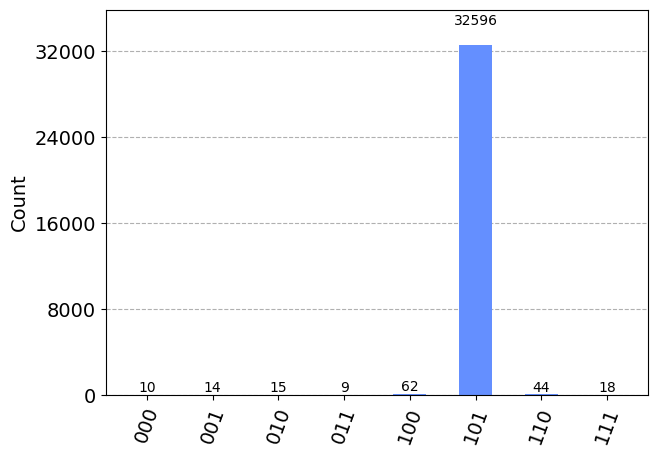

In [3]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)